In [87]:
import numpy as np
import scipy.io

#get matlab data as nested dictionary
training = scipy.io.loadmat('ECG_train.mat')
testing = scipy.io.loadmat('ECG_test.mat')

#extract data from dictionaries
X_normal = training['X_train_normal'].transpose()
X_abnormal = training['X_train_abnormal'].transpose()

X_normal_test = testing['X_test_normal'].transpose()
X_abnormal_test = testing['X_test_abnormal'].transpose()

In [88]:
def knearestneighbors(k: int, target):
    #keeps track of how mnay normal elements
    num_normal = 0

    #init neighbors tuple
    neighbors = []
    for i in range(0, k):
        neighbors.append((X_normal[:,i],))
    #print(neighbors[1])


    for i in range(0, X_normal.shape[1]):
        x = X_normal[:, i]
        for j in range(0, k):
            if(np.linalg.norm(target-x, 2) < np.linalg.norm(target-neighbors[j])):
                neighbors[j] = x
                break
    
    num_normal = k
    num_abnormal = 0

    for i in range(0, X_abnormal.shape[1]):
        x = X_abnormal[:, i]
        for j in range(0, k):
            if(np.linalg.norm(target-x, 2) < np.linalg.norm(target-neighbors[j])):
                neighbors[j] = x
                num_abnormal += 1
                num_normal -= 1
                break
    # if number of normal > number of abnormal, it's True
    if(k >= 1):
        return (num_normal >= num_abnormal)

In [101]:
normal_correct = []
abnormal_correct = []
x_axis = []
confusion_matrix = np.zeros((2,2))

k = 3 # number of neighbors to consider
for k in range(1,29,2):
    x_axis.append(k)
    #Classifying:
    for i in range(0, X_normal_test.shape[1]):    
        if knearestneighbors(k, X_normal_test[:,i]):
            confusion_matrix[0][0] += 1
        else:
            confusion_matrix[1][0] += 1

    for i in range(0, X_abnormal_test.shape[1]):
        if knearestneighbors(k, X_abnormal_test[:,i]):
            confusion_matrix[0][1] += 1
        else:
            confusion_matrix[1][1] += 1

    total_normal = confusion_matrix[0][0]+confusion_matrix[1][0]
    total_abnormal = confusion_matrix[0][1]+confusion_matrix[1][1]
    #print(confusion_matrix)
    normal_correct.append(confusion_matrix[0][0]/total_normal)
    abnormal_correct.append(confusion_matrix[1][1]/total_abnormal)


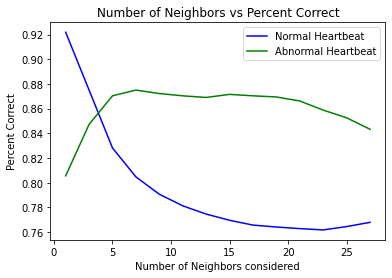

In [104]:
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

plt.plot(x_axis, normal_correct, color = 'b')
plt.plot(x_axis, abnormal_correct, color = 'g')
plt.title("Number of Neighbors vs Percent Correct")
plt.ylabel('Percent Correct')
plt.xlabel('Number of Neighbors considered')
#plt.show()
plt.legend(['Normal Heartbeat', 'Abnormal Heartbeat'])
plt.savefig('k_nearest.png')
